In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv('Alcohol_Sales.csv')
data1

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
data2=pd.read_csv('Miles_Traveled.csv')
data2

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [10]:
data1['DATE'] = pd.to_datetime(data1['DATE'])
data2['DATE'] = pd.to_datetime(data2['DATE'])

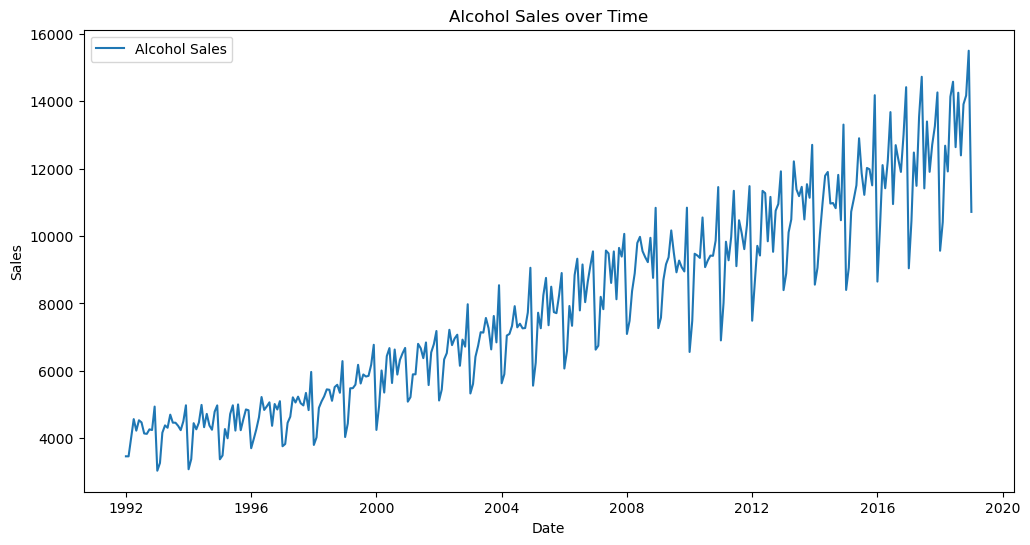

In [13]:
# Plot alcohol sales data
plt.figure(figsize=(12, 6))
plt.plot(data1['DATE'], data1['S4248SM144NCEN'], label='Alcohol Sales')
plt.title('Alcohol Sales over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



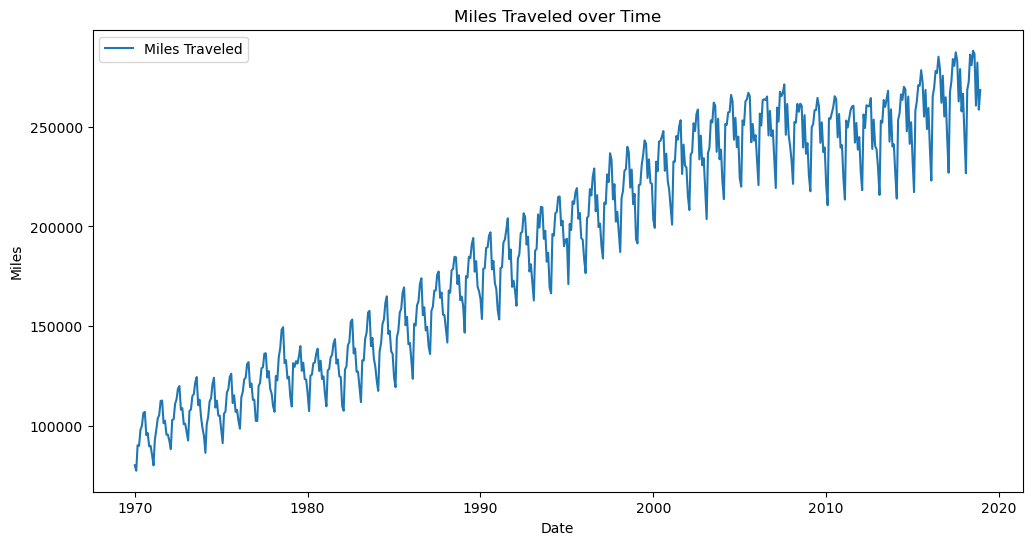

In [14]:
# Plot miles traveled data
plt.figure(figsize=(12, 6))
plt.plot(data2['DATE'], data2['TRFVOLUSM227NFWA'], label='Miles Traveled')
plt.title('Miles Traveled over Time')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.legend()
plt.show()

In [28]:
# Function to train ARIMA model and make forecasts
def train_arima_and_forecast(data, order=(1, 1, 1), forecast_steps=12):
    model = ARIMA(data, order=order)
    fit = model.fit()
    forecast = fit.forecast(steps=forecast_steps)
    return fit, forecast

In [29]:
# Example: Train ARIMA model for Alcohol Sales (data1)
model_data1, forecast_data1 = train_arima_and_forecast(data1['S4248SM144NCEN'], order=(1, 1, 1))

# Example: Train ARIMA model for Miles Traveled (data2)
model_data2, forecast_data2 = train_arima_and_forecast(data2['TRFVOLUSM227NFWA'], order=(1, 1, 1))

In [30]:
# Function to evaluate model using RMSE
def evaluate_forecast(test_data, forecast):
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    return rmse

In [33]:
# Example: Evaluate forecasts for Alcohol Sales (data1)
test_data1 = data1['S4248SM144NCEN'].iloc[-12:]  # Example: assuming last 12 months are test data
rmse_data1 = evaluate_forecast(test_data1, forecast_data1)
rmse_data1

1487.7305116970413

In [34]:
# Example: Evaluate forecasts for Miles Traveled (data2)
test_data2 = data2['TRFVOLUSM227NFWA'].iloc[-12:]  # Example: assuming last 12 months are test data
rmse_data2 = evaluate_forecast(test_data2, forecast_data2)
rmse_data2

18038.039290761193

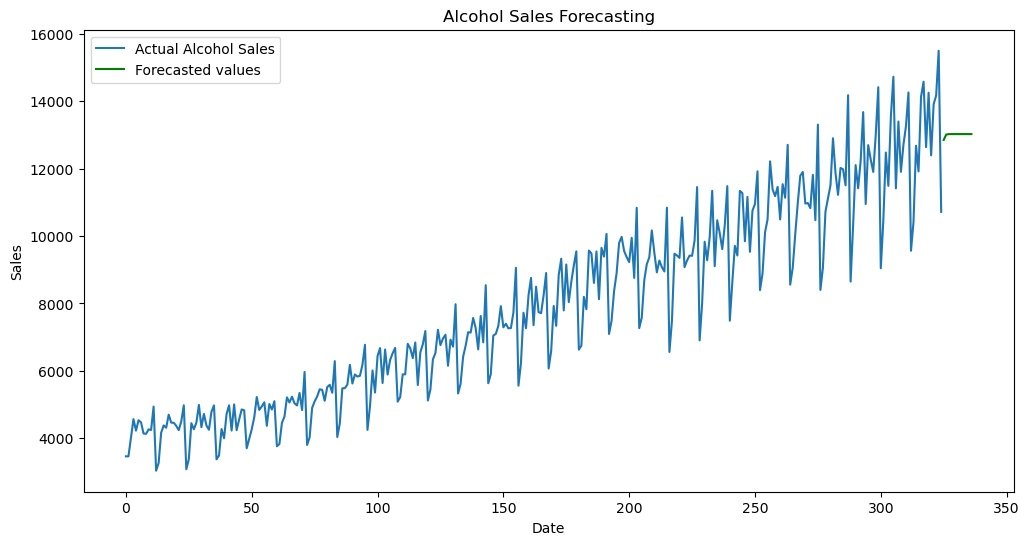

In [35]:
# Plotting forecasts for Alcohol Sales (data1)
plt.figure(figsize=(12, 6))
plt.plot(data1.index, data1['S4248SM144NCEN'], label='Actual Alcohol Sales')
plt.plot(forecast_data1.index, forecast_data1, color='green', label='Forecasted values')
plt.title('Alcohol Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

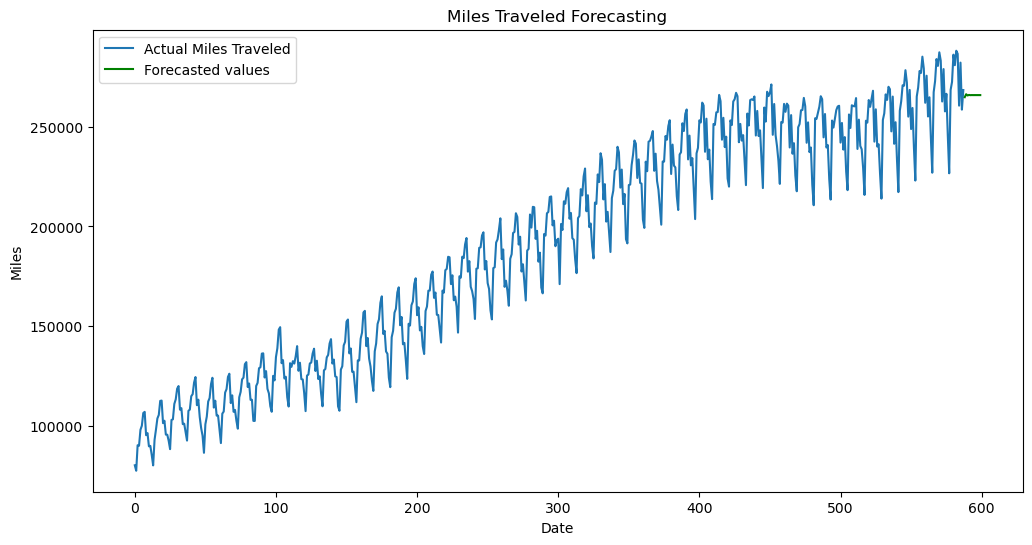

In [36]:
# Plotting forecasts for Miles Traveled (data2)
plt.figure(figsize=(12, 6))
plt.plot(data2.index, data2['TRFVOLUSM227NFWA'], label='Actual Miles Traveled')
plt.plot(forecast_data2.index, forecast_data2, color='green', label='Forecasted values')
plt.title('Miles Traveled Forecasting')
plt.xlabel('Date')
plt.ylabel('Miles')
plt.legend()
plt.show()